---
### 01. Exploratory Data Analysis (EDA)

**Objective:** To Perform an Exploratory Data Analysis (EDA) to form an indepth understanding of data characteristics, identify anomalies, and uncover potential issues in preparation for feature engineering and modelling .

-----

In [8]:
import sys
import pandas as pd

from pathlib import Path
PROJECT_ROOT = Path().resolve().parent  # go up from notebooks/ to project root
sys.path.insert(0, str(PROJECT_ROOT))

In [9]:
from src.data_loader import load_data
# import preprocessing function
from src.preprocessing import class_balance, check_duplicates, missingness, histograms_vis, box_plots

In [10]:
# use data loader to import the dataset
DATA_PATH = PROJECT_ROOT / "data" / "creditcard.csv"

raw_data = load_data(DATA_PATH)

raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
# check class balance
class_balance(raw_data)

,count,Percentage of the Class
Class,,
0,284315,99.827
1,492,0.173


In [12]:
# confirm whether there are missing values
missingness(raw_data)

No missing values


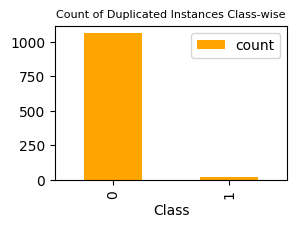

In [13]:
#check for duplicated
class_wise_count = check_duplicates(raw_data)

In [14]:
# duplications class-wise
pd.DataFrame(class_wise_count)

,count
Class,
0,1062
1,19


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

`Observations:`

- No missing values.

- All features have a uniform data type, i.e., numerical (floats or integers).

- There are 1,081 duplicated instances, 19 of which are from the minority class. `Further assessment is required`.

- The class distribution is confirmed to be severely imbalanced, i.e., the minority class represents only `0.173%`of the dataset.

-------

#### Feature Distribution Analysis

#### Histograms

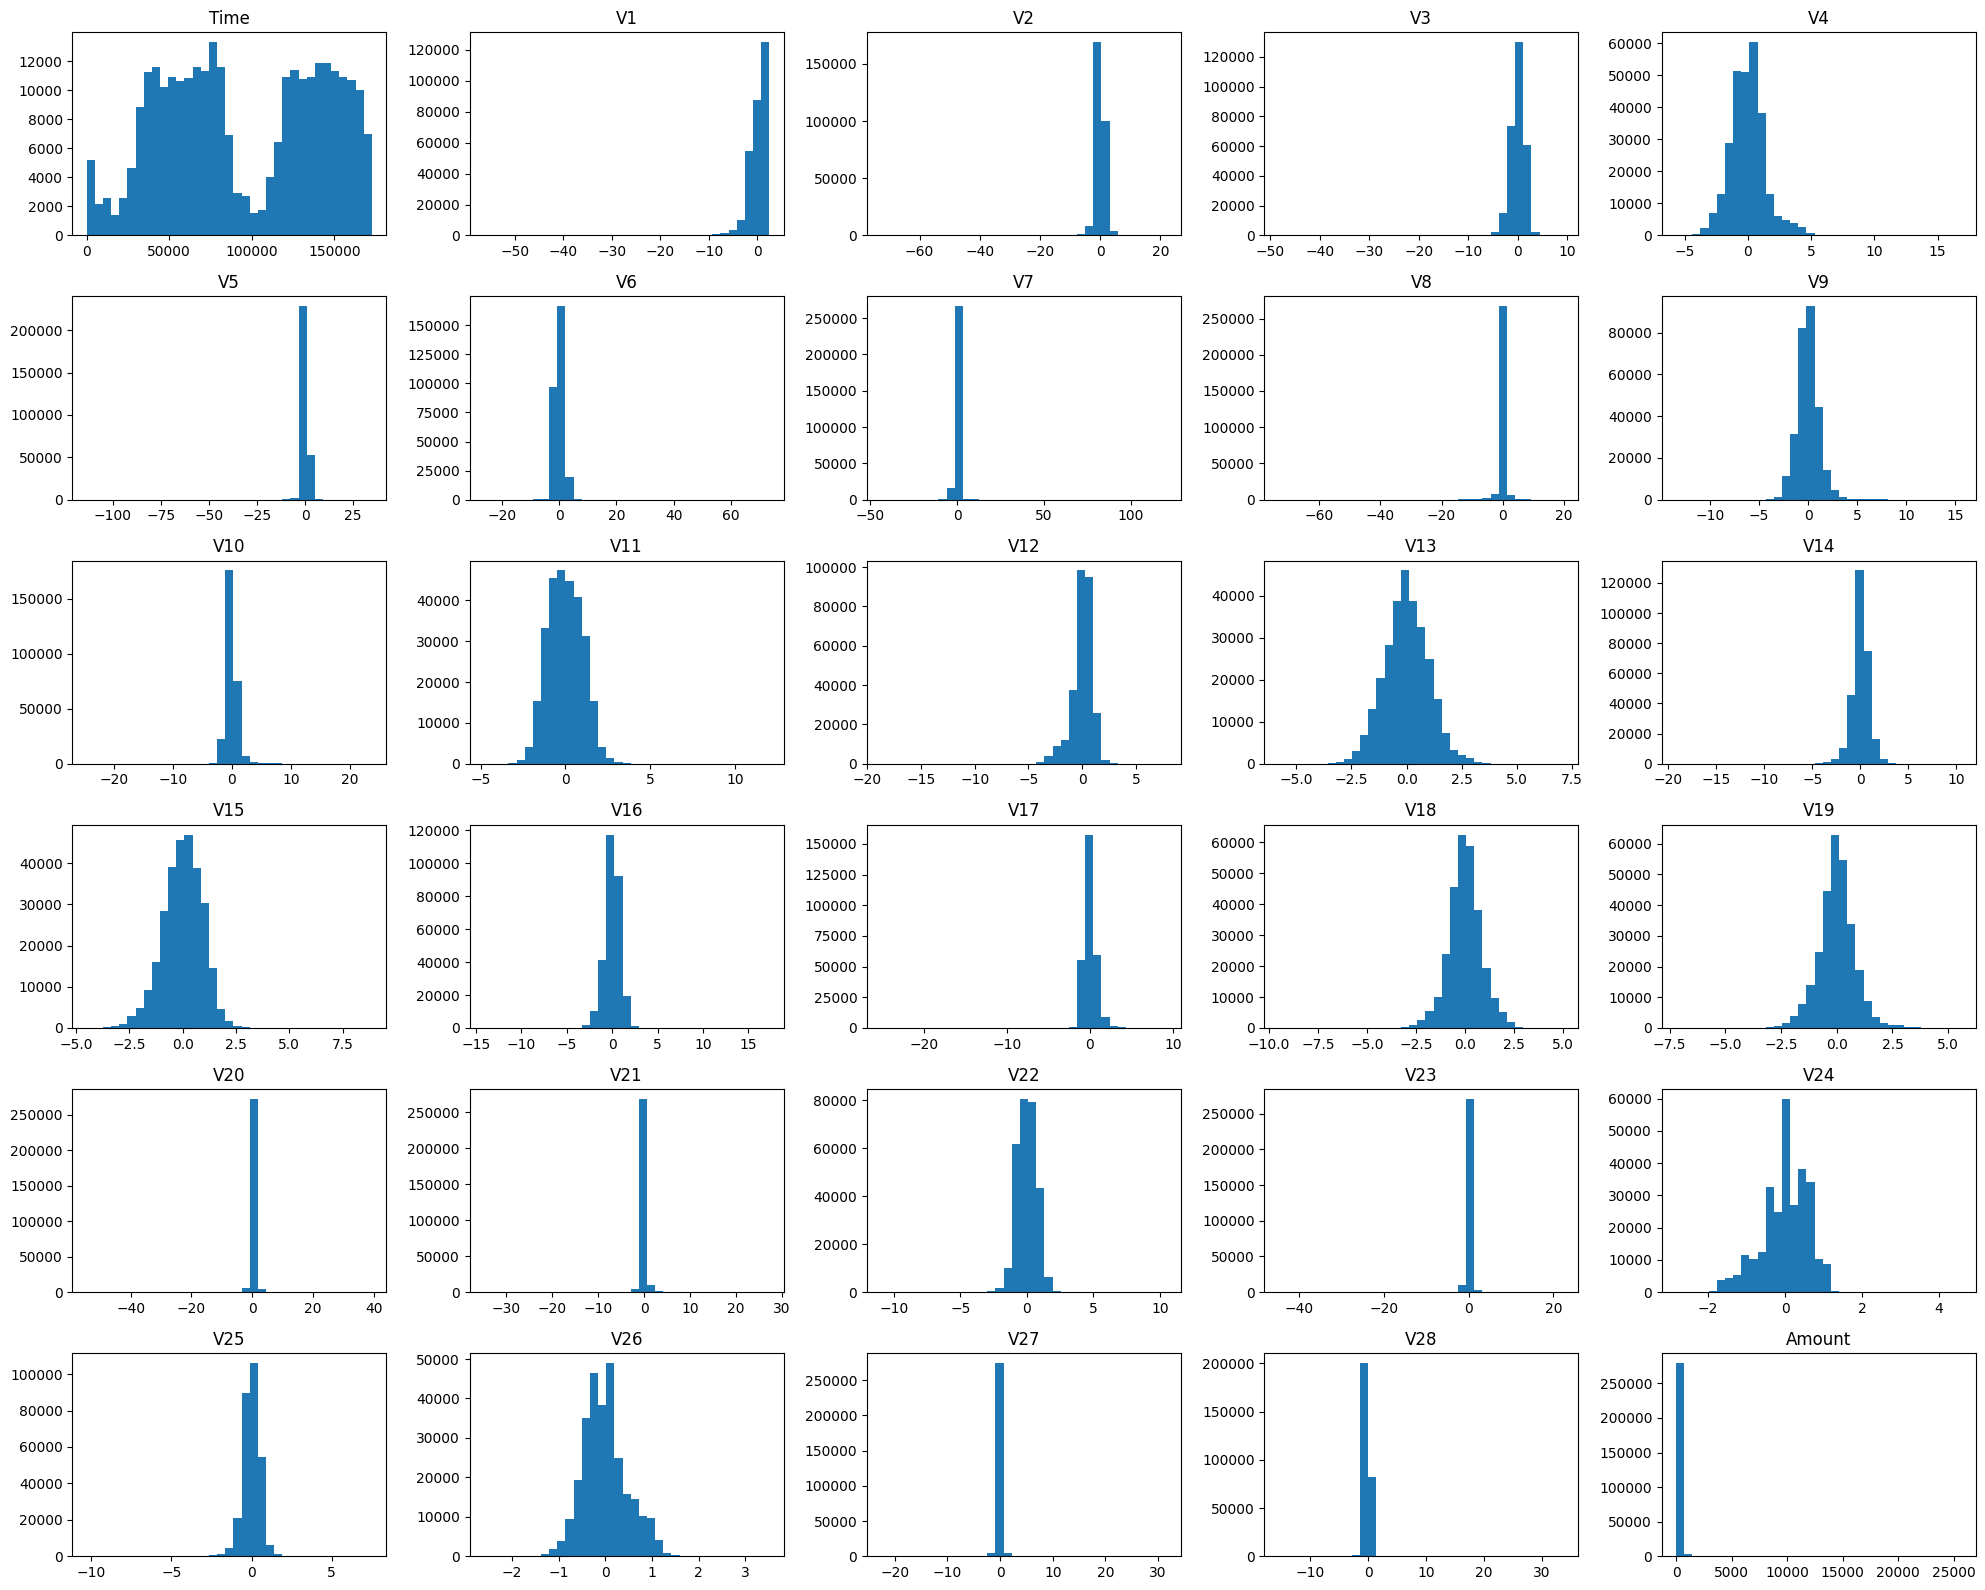

In [15]:
histograms_vis(raw_data)

`Observations:`

-  Time feature shows a `multimodal` distribution, with several peaks across its range, this indicates there are periods of high and other of low transaction frequency. `This could benefit tree-based models`.

- The following features (V4, V9, V11, V13, V15, V18, and V19) display near-perfect symmetrical normal distributions, while V1 is skewed to the left (tail to the left).

- This indicates that these features are well-scaled and free from extreme anomalies /outliers , which benefits linear models and distance based models (e.g. logistic regression and KNN).

- For non-linear models this normal distribution is less important for their performance, but still suggest stable and consistent behaviour.

-  Majority of the remaining features are near highly concentrated with relatively low variance (e.g. V2, V5, V7, V8, V20, V21, V23, V27, V28, and Amount). Which means they provide low signal for model that rely on continuous variation e.g. linear models, however, `tree-based model can handel these effectively`.

----

#### Box Plots (Distribution and Outlier Visualization and Assessment)

In [10]:
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


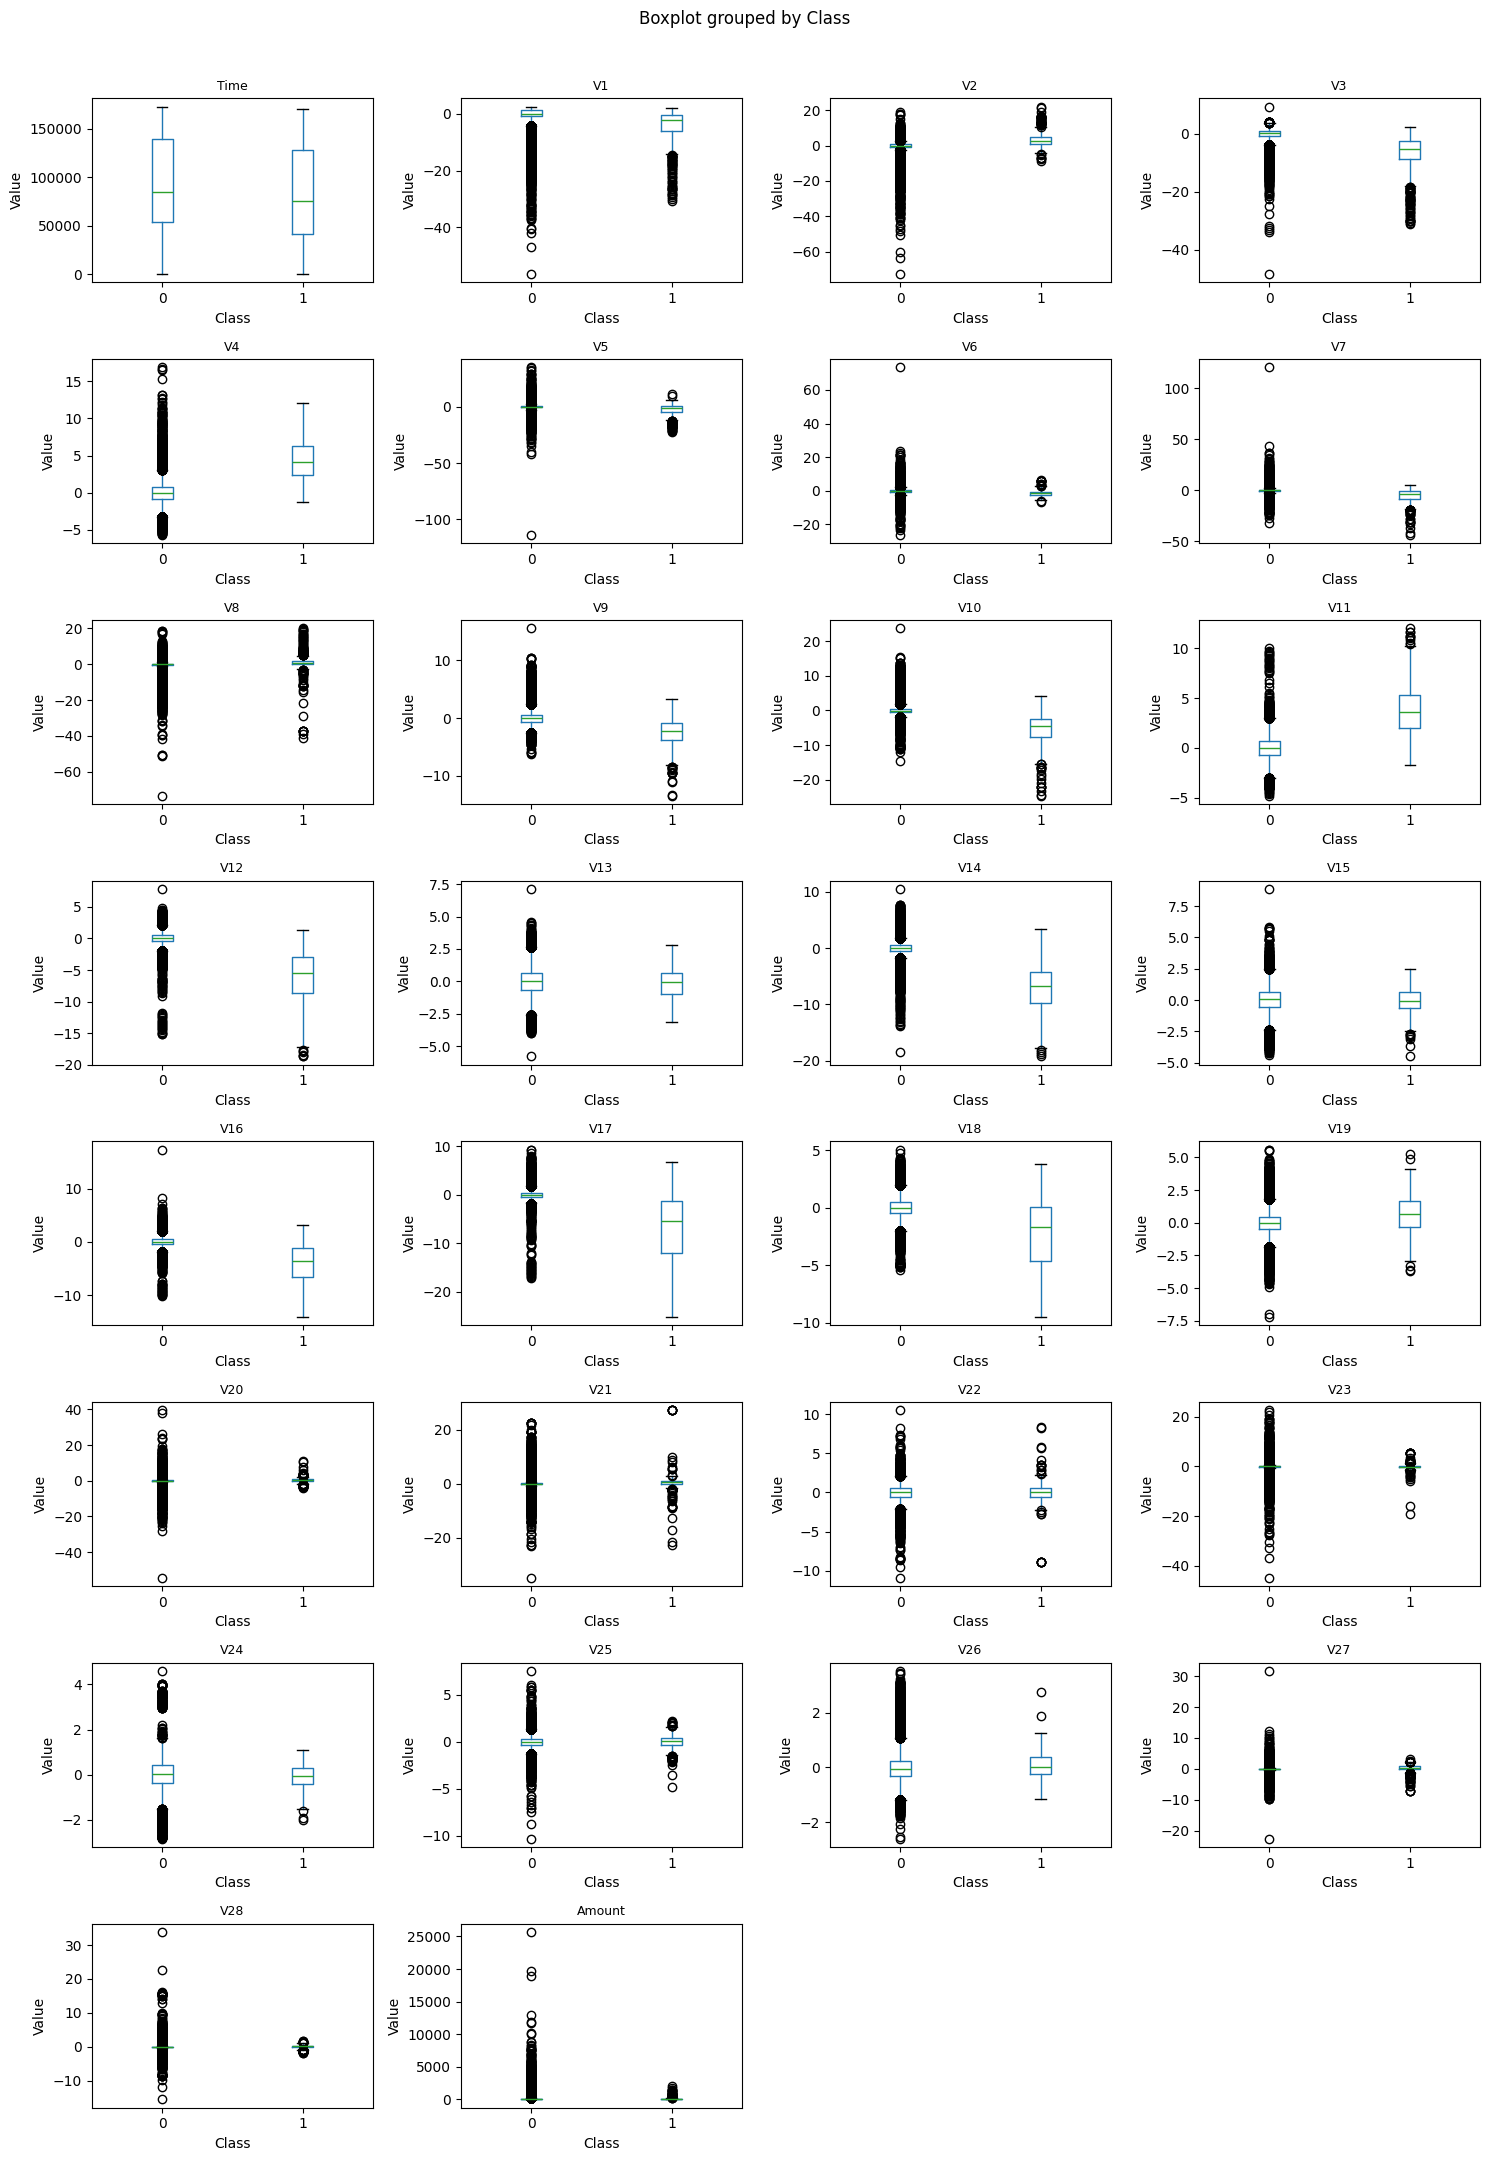

In [16]:
box_plots(raw_data)

`Observations:`
- `Strong Predictors` —— Based on the class-wise boxplots, the interquartile ranges (IQRs)` (the rectangular boxes)  for features `V4, V9, V10, V11, V12, V14, V16 and V17` do not overlap, this meaning their medians (50th percentiles) differ between the classes. This suggests different value groupings for each class, indicating these features could be  strong predictors for class separation.
- Four features (V4, V11, V12, V14) exhibit the strongest interquartile range separation between fraud and non-fraud transactions.
- Features with overlapping medians between the two classes (e.g., Time) may not discriminate well between fraudulent and non-fraudulent transactions, as their values tend to be around the same range across the two classes.

- In majority of the features Class 1 (fraud) shows greater variance; this is illustrated by the larger IQR box compared to Class 0 (non-fraud).

- While class 0 (non-fraud) have more outliers than Class 1 (fraud) in most of the features.
---

#### EDA Final Conclusion

This EDA uncovers that while several features display good separation between classes and show stable distributions, others have more complex behaviors. The well-distributed features could perform reasonably with simple linear models; however, other observations: such as features with high concentration (low variance), multimodal distributions, and severe class imbalance, suggest complexity. Furthermore, several features show strong overlap in value ranges between the two classes, and some exhibit some outliers specially in ‘non-fraud’ class.

Overall, this fraud detection problem is non-linear, highly imbalanced, and complex this means advanced models such as ensemble tree-based methods would likely perform better than simple linear models (e.g., Logistic Regression).


`Next` - Following this EDA and based on its conclusion the next step involves feature engineering to enhance model's ability to separate these two classes. Several features e.g. feature with distinct median between the classes can be further explored and engineered to improve the model predictive power.

------------
Next Step: Is Feature Engineering → Feature Engineering and Preparing the data for modeling

-----